<a href="https://colab.research.google.com/github/SainiParv05/AIML/blob/Experiments/Exp_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exp 5: Exploratory Data Analysis (EDA)**
## 1.	Importing Libraries:
  •	import matplotlib.pyplot as plt: Imports Matplotlib for plotting graphs.

  •	import seaborn as sns: Imports Seaborn for more advanced and attractive data visualization.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## 2.	Reading the Dataset:
•	Loads the dataset, same as Experiment 4.


In [8]:
upload = files.upload()
df = pd.read_csv('titanic.csv')

Saving titanic.csv to titanic.csv


##3.	Summary Statistics:
•	Summarize the dataset in terms of average, sum, etc.

In [9]:
print("Summarized Dataset:")
print(df.describe())

Summarized Dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


##4.	Checking Missing Values:
•	Counts the number of missing (null) values for each column, to identify
incomplete data and displays it.


In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##5. Histograms:
Visualizes the distribution of numerical columns using histograms.

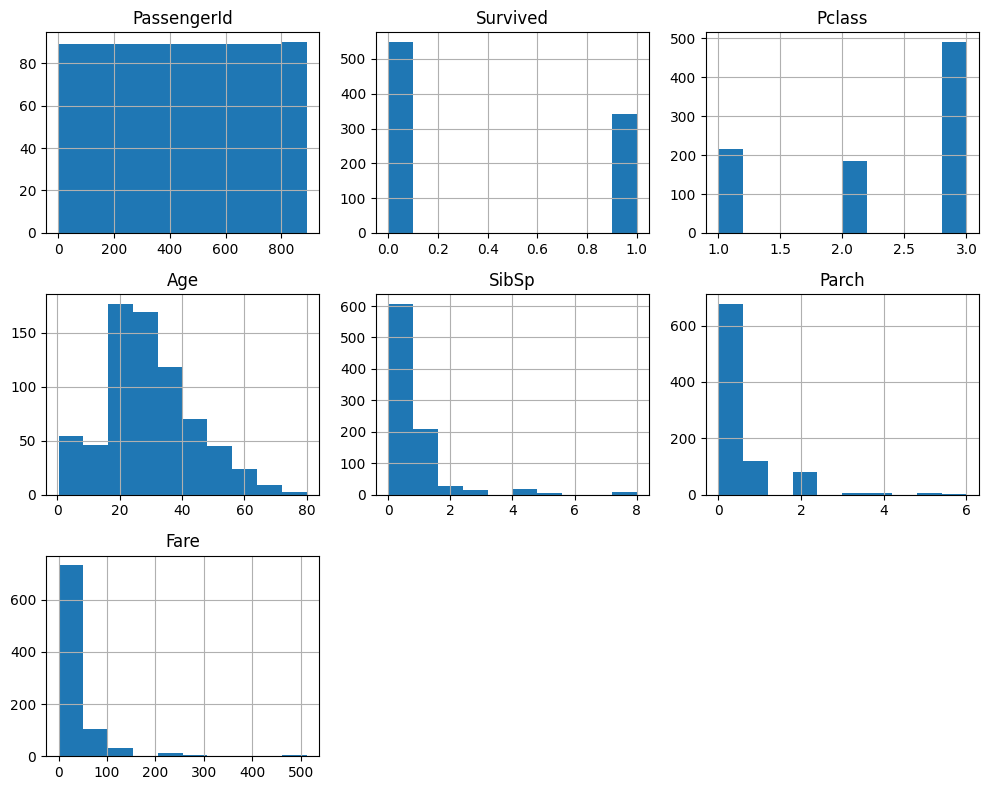

In [11]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

##6. Correlation Heatmap:
`sns.heatmap(df.corr(), annot=True, cmap='coolwarm'):` This plots a heatmap showing correlations between numerical columns. Strong positive or negative correlations are highlighted.

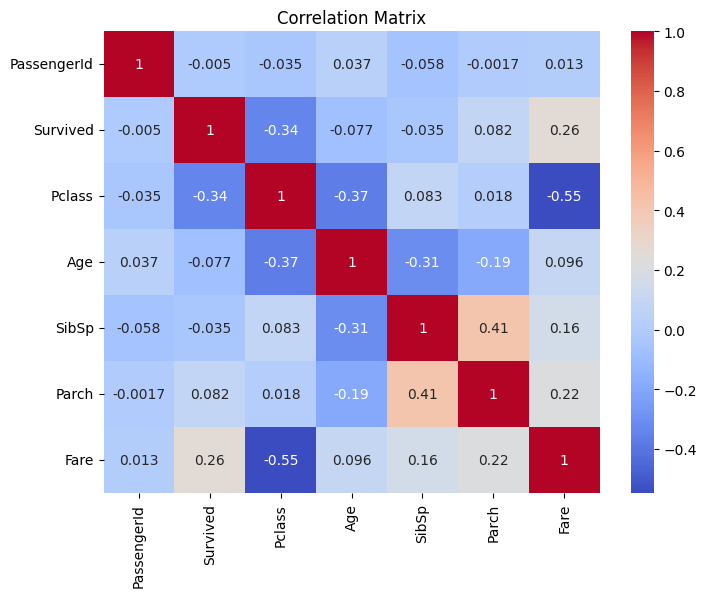

In [12]:
numerical_df = df.select_dtypes(include='number')

# Check if there are any numerical columns before plotting
if not numerical_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns available for correlation matrix.")

##7. Boxplots for Outliers:
`sns.boxplot(df[col])`: This generates boxplots for each numerical column, which helps identify outliers. Outliers are data points that lie outside the typical range of the dataset.

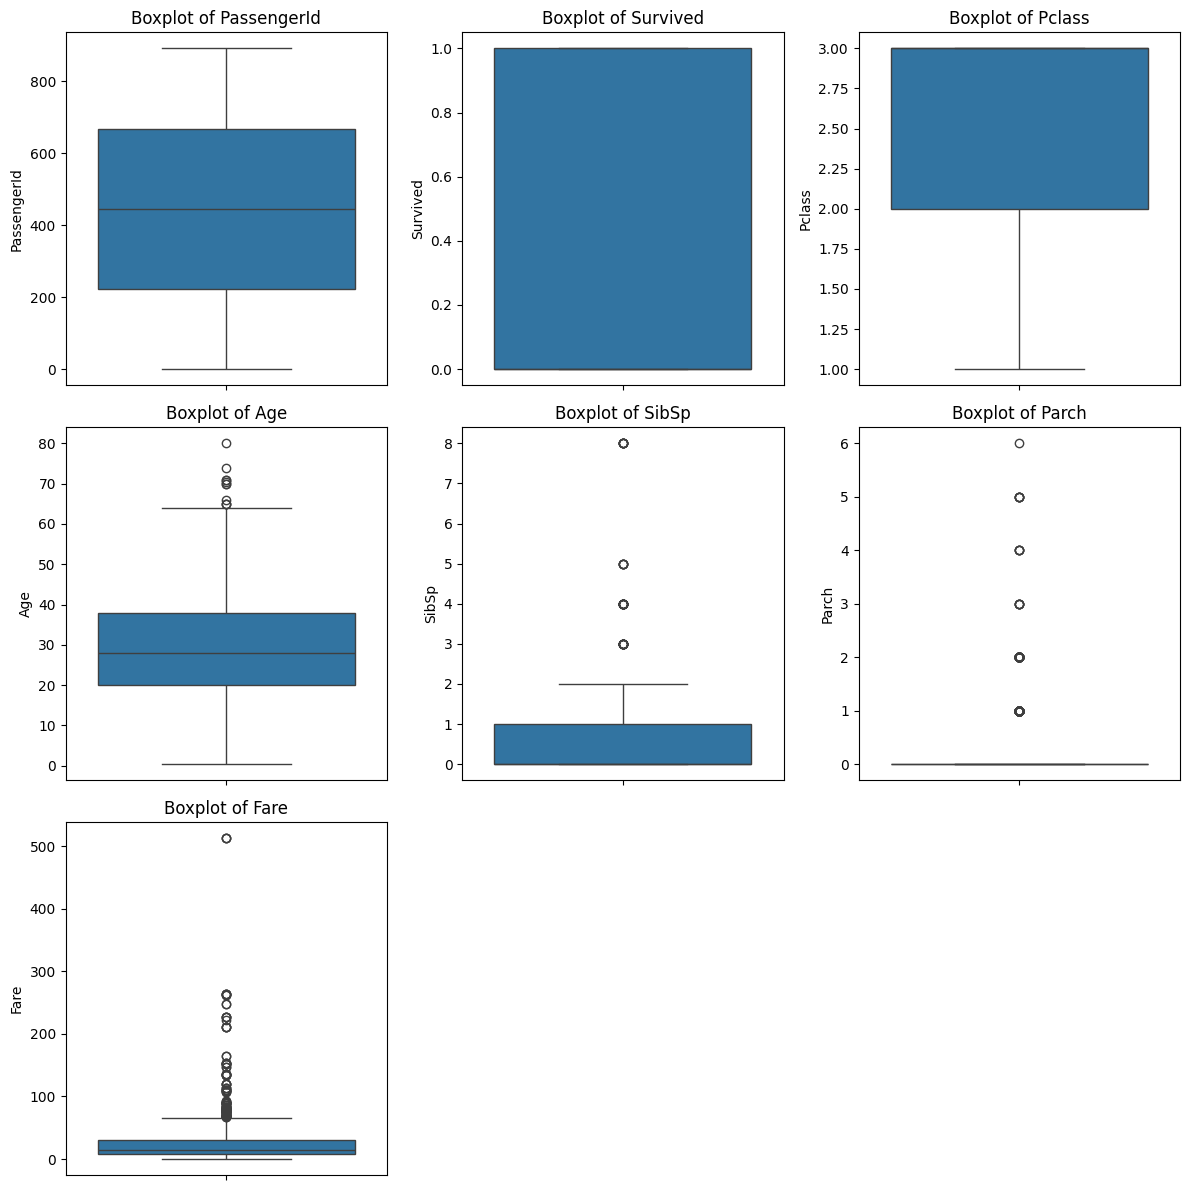

In [13]:
numerical_cols = df.select_dtypes(include='number').columns

# Determine the number of subplots needed based on the number of numerical columns
n_cols = len(numerical_cols)
n_rows = (n_cols // 3) + 1  # Adjusting rows based on how many columns we have

# Create a figure with dynamic subplot arrangement
plt.figure(figsize=(12, n_rows * 4))

# Looping through each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, i)  # Adjusting the subplot grid dynamically

    # Dropping missing and non-finite values (NaN, inf, -inf) from the column
    clean_col = df[col].dropna()  # Remove NaN values
    clean_col = clean_col[clean_col.apply(lambda x: x != float('inf') and x != float('-inf'))]  # Remove inf values

    # Plotting the cleaned data
    if not clean_col.empty:  # Ensure there is data to plot
        sns.boxplot(clean_col)
        plt.title(f'Boxplot of {col}')
    else:
        plt.title(f'{col} (No valid data)')

plt.tight_layout()
plt.show()